In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_log_error

In [99]:
data = pd.read_csv('train.csv')
dataset_test = pd.read_csv('test.csv')

In [100]:
data.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


In [101]:
dataset_test.head()

,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag
0,id3004672,1,2016-06-30 23:59:58,1,-73.988129,40.732029,-73.990173,40.756680,N
1,id3505355,1,2016-06-30 23:59:53,1,-73.964203,40.679993,-73.959808,40.655403,N
2,id1217141,1,2016-06-30 23:59:47,1,-73.997437,40.737583,-73.986160,40.729523,N
3,id2150126,2,2016-06-30 23:59:41,1,-73.956070,40.771900,-73.986427,40.730469,N
4,id1598245,1,2016-06-30 23:59:33,1,-73.970215,40.761475,-73.961510,40.755890,N


In [102]:
#2. make EDA
#We will only make it on our train set to better understand patterns and dependencies and then make 
#better predictions
data.describe()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
count,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06
mean,1.534950e+00,1.664530e+00,-7.397349e+01,4.075092e+01,-7.397342e+01,4.075180e+01,9.594923e+02
std,4.987772e-01,1.314242e+00,7.090186e-02,3.288119e-02,7.064327e-02,3.589056e-02,5.237432e+03
min,1.000000e+00,0.000000e+00,-1.219333e+02,3.435970e+01,-1.219333e+02,3.218114e+01,1.000000e+00
25%,1.000000e+00,1.000000e+00,-7.399187e+01,4.073735e+01,-7.399133e+01,4.073588e+01,3.970000e+02
50%,2.000000e+00,1.000000e+00,-7.398174e+01,4.075410e+01,-7.397975e+01,4.075452e+01,6.620000e+02
75%,2.000000e+00,2.000000e+00,-7.396733e+01,4.076836e+01,-7.396301e+01,4.076981e+01,1.075000e+03
max,2.000000e+00,9.000000e+00,-6.133553e+01,5.188108e+01,-6.133553e+01,4.392103e+01,3.526282e+06


In [103]:
#checking the dimension of the dataset and datatype of the values in each column
print('Dimension: ' + str(data.shape))
print('Dimension: ' + str(dataset_test.shape))

Dimension: (1458644, 11)
Dimension: (625134, 9)


As we can see there are no 'dropoff_datetime' in the test dataset so we will just delete it in our train

In [104]:
data = data.drop(columns = ['dropoff_datetime'])

In [105]:
#checking the missing values of the dataset
print("Train dataset: ")
print(data.isnull().sum())

Train dataset: 
id                    0
vendor_id             0
pickup_datetime       0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
dtype: int64


We got all zeros for which means that there are no missing values in our train dataset

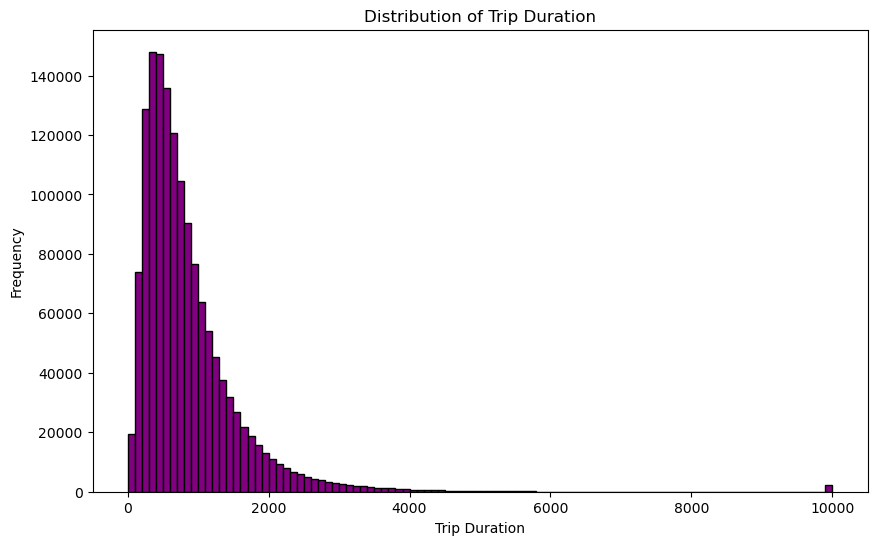

In [106]:
#distribution of a trip duration
plt.figure(figsize=(10, 6))
plt.hist(data['trip_duration'].clip(None, 10000), bins=100, edgecolor='black', color = 'purple')
plt.xlabel('Trip Duration')
plt.ylabel('Frequency')
plt.title('Distribution of Trip Duration')
plt.show()

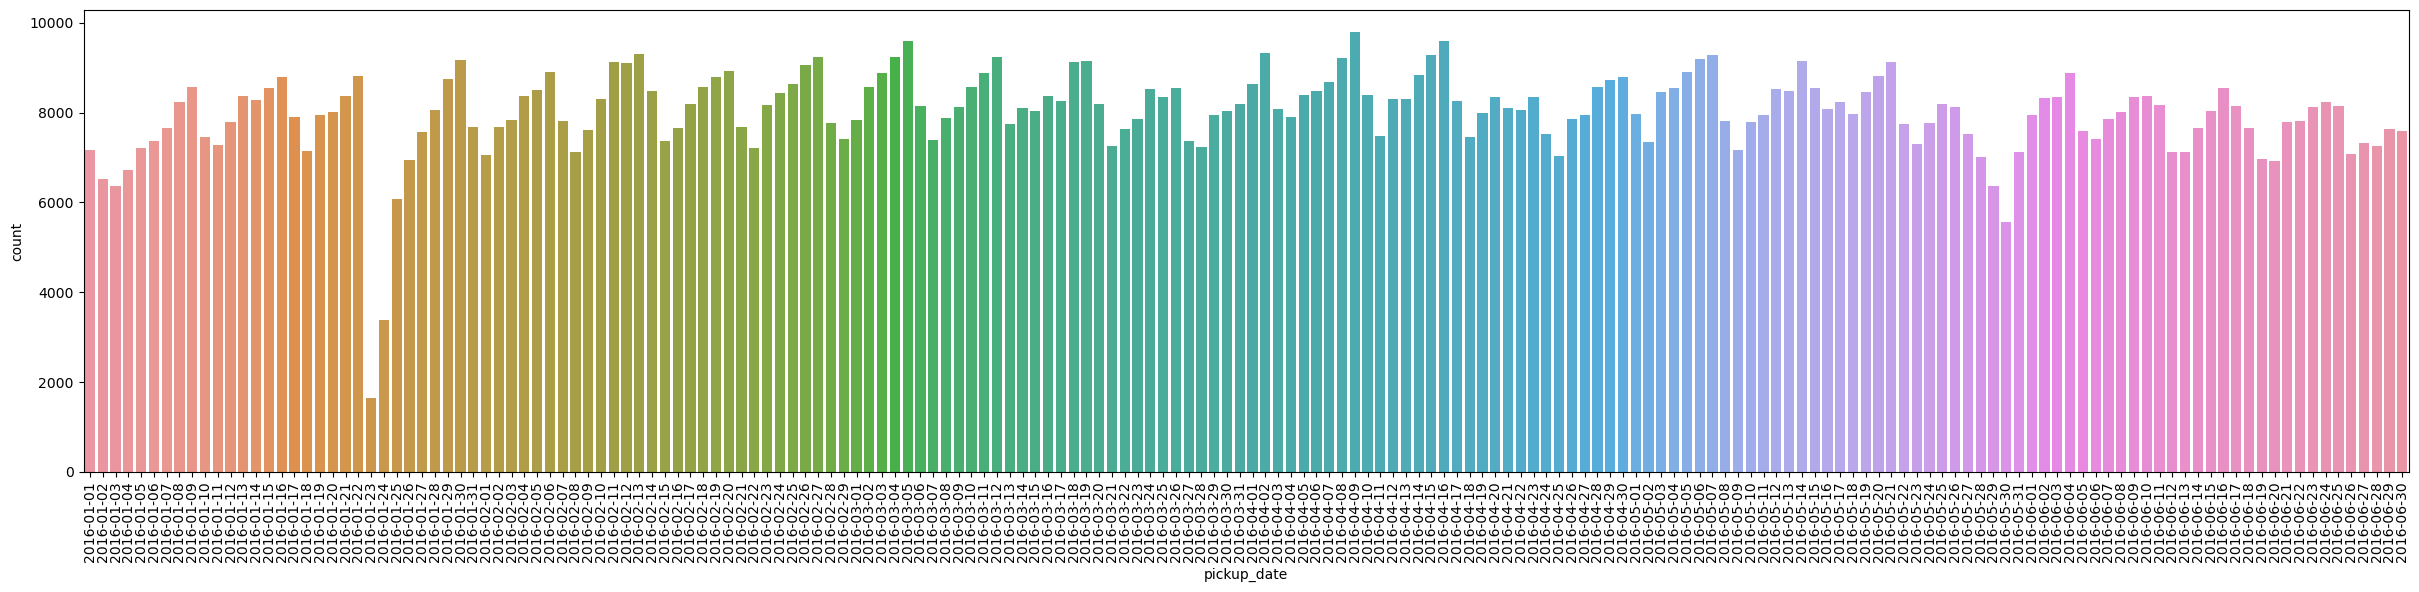

In [107]:
#seing the amount of rides on each date
fig, ax = plt.subplots(figsize=(30, 6))
data['pickup_datetime'] = pd.to_datetime(data['pickup_datetime'])
data['pickup_date'] = data['pickup_datetime'].dt.date
plt.xticks(rotation=90)
sns.countplot(data = data.sort_values(by='pickup_date'), x = 'pickup_date', ax = ax)
plt.show()

We can probably see two very low values which may be due to the fact that it is not just a regular date but some kind of a holiday, for example

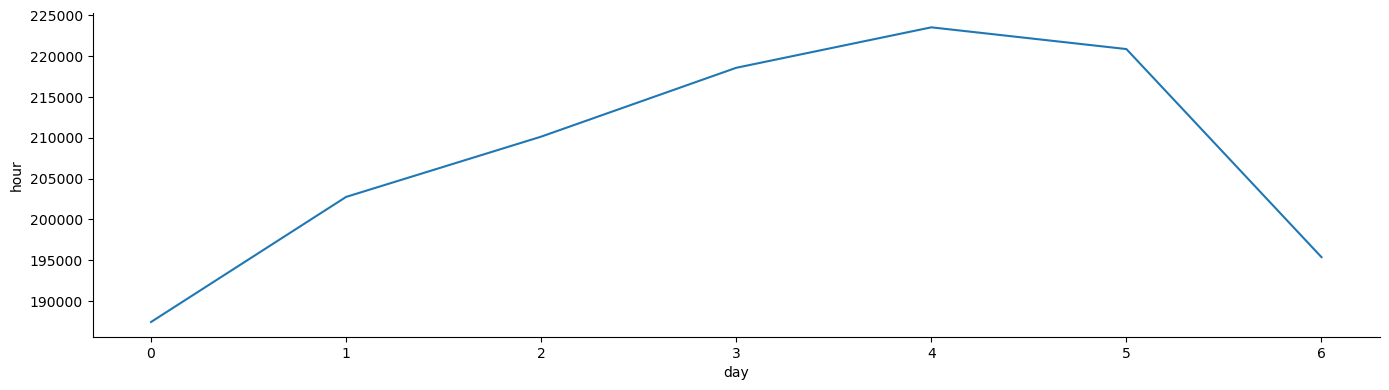

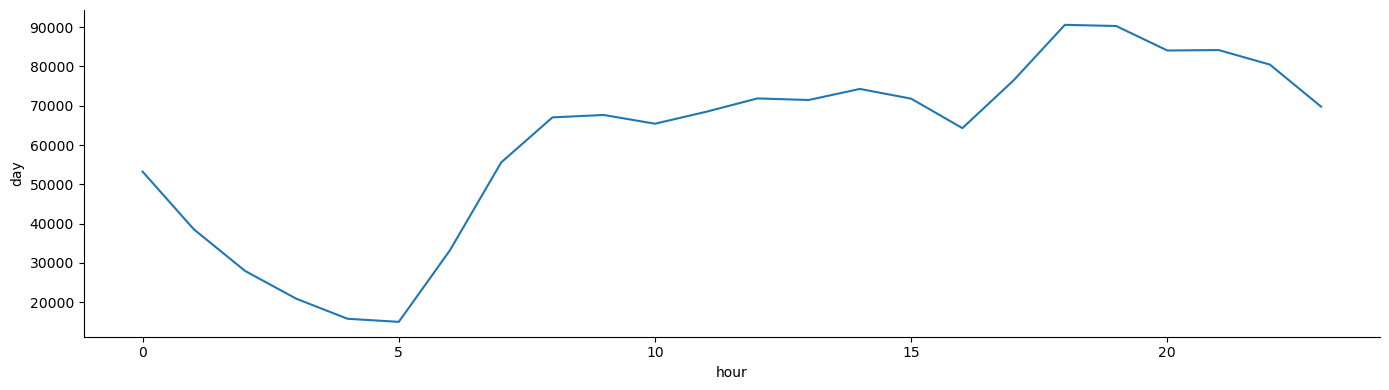

In [108]:
#amount of taxi calls depending on the month, day and hour
data['month'] = data['pickup_datetime'].dt.month
data['day'] = data['pickup_datetime'].dt.weekday
data['hour'] = data['pickup_datetime'].dt.hour

sns.relplot(data=data.groupby('day').count()['hour'], kind = "line", height = 4, aspect = 3.5)
sns.relplot(data=data.groupby('hour').count()['day'], kind = "line", height = 4, aspect = 3.5)
plt.show()

from this plots we can see how the need in taxi changes throughout days and hours

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, '1'),
  Text(1, 0, '2'),
  Text(2, 0, '5'),
  Text(3, 0, '3'),
  Text(4, 0, '6'),
  Text(5, 0, '4'),
  Text(6, 0, '0'),
  Text(7, 0, '7'),
  Text(8, 0, '9'),
  Text(9, 0, '8')])

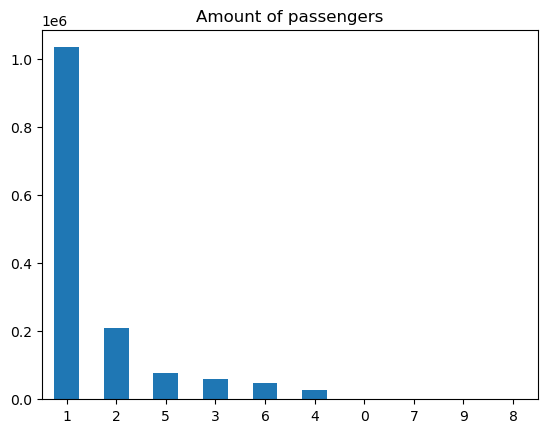

In [109]:
#class distribution among the number of passengers
dataset_train['passenger_count'].value_counts().plot(kind = 'bar', title = 'Amount of passengers')
plt.xticks(rotation = 0)

(array([1, 2, 3, 4, 5, 6, 7]),
 [Text(1, 0, 'vendor_id'),
  Text(2, 0, 'passenger_count'),
  Text(3, 0, 'pickup_longitude'),
  Text(4, 0, 'pickup_latitude'),
  Text(5, 0, 'dropoff_longitude'),
  Text(6, 0, 'dropoff_latitude'),
  Text(7, 0, 'trip_duration')])

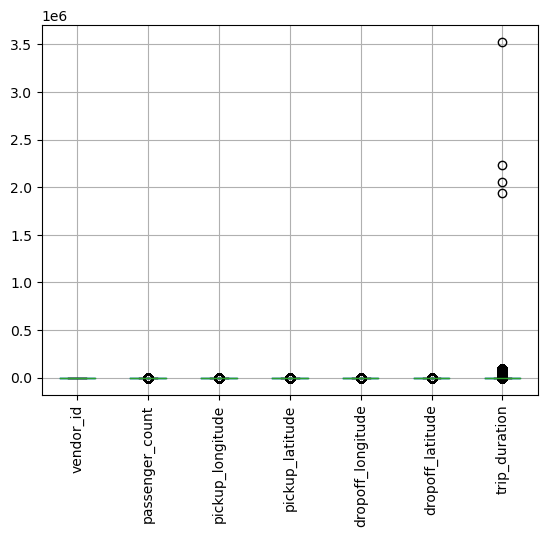

In [110]:
#trying to identify the outliers of the numerical values
dataset_train.boxplot()
plt.xticks(rotation = 90)

As we can see there are outliers only in the duration but that is completely okay cause there are other parameters that may have an impact on this. Plus this is the column we have to predict for our test set so, as it seems to me, removing this outliers won't be correct

In [111]:
data['pickup_datetime'] = data['pickup_datetime'].dt.hour * 60 * 60 + data['pickup_datetime'].dt.minute * 60 + data['pickup_datetime'].dt.second

In [114]:
data['store_and_fwd_flag'] = data['store_and_fwd_flag'].replace({'N': 0, 'Y': 1})

In [125]:
#3. Apply RF, linear regression and GB (xgboost or lightgbm or catboost) algorithms to the data. 
from sklearn.model_selection import train_test_split
import catboost as cb

to_drop = ['trip_duration', 'pickup_date', 'month', 'day', 'hour', 'id' ]
X = data.drop(to_drop, axis=1)
y = data['trip_duration']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

1053743    1133
273748      887
433988      686
1442481     818
1025834     951
           ... 
259178     1281
1414414     833
131932     1285
671155      389
121958     1570
Name: trip_duration, Length: 1166915, dtype: int64

In [136]:
#we will train RF only on sample of the data, because it takes too long fo RF to be trained on such a huge dataset
sampled_data = data.sample(frac=0.01, random_state=42)
X = sampled_data.drop(to_drop, axis=1)
y = sampled_data['trip_duration']
X_train_sampled, X_test_sampled, y_train_sampled, y_test_sampled = train_test_split(X, y, test_size=0.2, random_state=42)

In [157]:
#Random forest on sample of data
rf_model = RandomForestRegressor()
rf_model.fit(X_train_sampled, y_train_sampled)

RandomForestRegressor()

In [158]:
# Linear Regression on full data
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

LinearRegression()

In [159]:
# CatBoost on full data
cb_model = cb.CatBoostRegressor()
cb_model.fit(X_train, y_train)

Learning rate set to 0.12496
0:	learn: 5620.4308719	total: 73.9ms	remaining: 1m 13s
1:	learn: 5611.9129894	total: 138ms	remaining: 1m 8s
2:	learn: 5608.8757963	total: 197ms	remaining: 1m 5s
3:	learn: 5605.0308268	total: 251ms	remaining: 1m 2s
4:	learn: 5599.5427779	total: 304ms	remaining: 1m
5:	learn: 5582.8027218	total: 360ms	remaining: 59.7s
6:	learn: 5581.4330891	total: 414ms	remaining: 58.8s
7:	learn: 5573.0120283	total: 474ms	remaining: 58.8s
8:	learn: 5571.8484706	total: 524ms	remaining: 57.7s
9:	learn: 5570.0616615	total: 585ms	remaining: 57.9s
10:	learn: 5563.1327831	total: 638ms	remaining: 57.4s
11:	learn: 5561.5146486	total: 691ms	remaining: 56.9s
12:	learn: 5547.6609165	total: 743ms	remaining: 56.4s
13:	learn: 5531.0543797	total: 794ms	remaining: 55.9s
14:	learn: 5515.4338761	total: 844ms	remaining: 55.4s
15:	learn: 5476.6625675	total: 896ms	remaining: 55.1s
16:	learn: 5475.5937406	total: 946ms	remaining: 54.7s
17:	learn: 5475.2916606	total: 1000ms	remaining: 54.5s
18:	learn

156:	learn: 4637.0897793	total: 8.87s	remaining: 47.6s
157:	learn: 4636.8232411	total: 8.93s	remaining: 47.6s
158:	learn: 4602.0294689	total: 8.98s	remaining: 47.5s
159:	learn: 4601.9616181	total: 9.04s	remaining: 47.5s
160:	learn: 4601.5055468	total: 9.09s	remaining: 47.4s
161:	learn: 4601.4522336	total: 9.15s	remaining: 47.3s
162:	learn: 4601.4438690	total: 9.19s	remaining: 47.2s
163:	learn: 4600.2387804	total: 9.24s	remaining: 47.1s
164:	learn: 4586.1123036	total: 9.3s	remaining: 47s
165:	learn: 4584.1642449	total: 9.35s	remaining: 47s
166:	learn: 4584.1044966	total: 9.4s	remaining: 46.9s
167:	learn: 4578.3070614	total: 9.46s	remaining: 46.8s
168:	learn: 4545.3265349	total: 9.52s	remaining: 46.8s
169:	learn: 4544.5895184	total: 9.57s	remaining: 46.7s
170:	learn: 4542.7493095	total: 9.62s	remaining: 46.6s
171:	learn: 4541.0182092	total: 9.67s	remaining: 46.6s
172:	learn: 4530.3171864	total: 9.73s	remaining: 46.5s
173:	learn: 4528.6899070	total: 9.78s	remaining: 46.4s
174:	learn: 4527

308:	learn: 3787.4171345	total: 24.4s	remaining: 54.6s
309:	learn: 3787.3787384	total: 24.6s	remaining: 54.7s
310:	learn: 3787.3015318	total: 24.7s	remaining: 54.8s
311:	learn: 3787.1267450	total: 24.9s	remaining: 54.8s
312:	learn: 3786.8317103	total: 25s	remaining: 54.9s
313:	learn: 3786.5194680	total: 25.1s	remaining: 54.9s
314:	learn: 3786.3433302	total: 25.3s	remaining: 55s
315:	learn: 3786.0506433	total: 25.4s	remaining: 55s
316:	learn: 3786.0079637	total: 25.6s	remaining: 55.1s
317:	learn: 3778.2146972	total: 25.7s	remaining: 55.2s
318:	learn: 3774.5781867	total: 25.9s	remaining: 55.2s
319:	learn: 3771.1656491	total: 26s	remaining: 55.3s
320:	learn: 3770.9953297	total: 26.1s	remaining: 55.3s
321:	learn: 3770.7414157	total: 26.3s	remaining: 55.3s
322:	learn: 3769.7021506	total: 26.4s	remaining: 55.4s
323:	learn: 3769.5630917	total: 26.6s	remaining: 55.4s
324:	learn: 3769.3029677	total: 26.7s	remaining: 55.5s
325:	learn: 3769.0865034	total: 26.8s	remaining: 55.5s
326:	learn: 3769.0

460:	learn: 3444.0187585	total: 46.5s	remaining: 54.4s
461:	learn: 3443.1578759	total: 46.6s	remaining: 54.3s
462:	learn: 3443.1036872	total: 46.8s	remaining: 54.3s
463:	learn: 3442.9781856	total: 46.9s	remaining: 54.2s
464:	learn: 3442.8372991	total: 47.1s	remaining: 54.2s
465:	learn: 3442.6276414	total: 47.2s	remaining: 54.1s
466:	learn: 3442.5803321	total: 47.4s	remaining: 54.1s
467:	learn: 3442.5493729	total: 47.5s	remaining: 54s
468:	learn: 3442.4607486	total: 47.7s	remaining: 54s
469:	learn: 3430.2572128	total: 47.9s	remaining: 54s
470:	learn: 3430.1999662	total: 48s	remaining: 53.9s
471:	learn: 3430.1097736	total: 48.1s	remaining: 53.8s
472:	learn: 3423.3138495	total: 48.3s	remaining: 53.8s
473:	learn: 3423.2503765	total: 48.4s	remaining: 53.7s
474:	learn: 3423.1814029	total: 48.6s	remaining: 53.7s
475:	learn: 3423.1150824	total: 48.7s	remaining: 53.6s
476:	learn: 3423.0454746	total: 48.8s	remaining: 53.6s
477:	learn: 3422.9967517	total: 49s	remaining: 53.5s
478:	learn: 3422.954

612:	learn: 3326.7342395	total: 1m 8s	remaining: 43.2s
613:	learn: 3326.6987380	total: 1m 8s	remaining: 43.1s
614:	learn: 3326.5701857	total: 1m 8s	remaining: 43s
615:	learn: 3326.4940311	total: 1m 8s	remaining: 42.9s
616:	learn: 3326.3999041	total: 1m 9s	remaining: 42.9s
617:	learn: 3326.3089540	total: 1m 9s	remaining: 42.8s
618:	learn: 3326.2557658	total: 1m 9s	remaining: 42.7s
619:	learn: 3326.1917912	total: 1m 9s	remaining: 42.6s
620:	learn: 3325.9972195	total: 1m 9s	remaining: 42.5s
621:	learn: 3325.9401232	total: 1m 9s	remaining: 42.4s
622:	learn: 3325.8813098	total: 1m 9s	remaining: 42.3s
623:	learn: 3325.8216662	total: 1m 10s	remaining: 42.2s
624:	learn: 3325.7566094	total: 1m 10s	remaining: 42.1s
625:	learn: 3325.6777702	total: 1m 10s	remaining: 42s
626:	learn: 3325.6268126	total: 1m 10s	remaining: 41.9s
627:	learn: 3325.5542411	total: 1m 10s	remaining: 41.8s
628:	learn: 3325.5186549	total: 1m 10s	remaining: 41.7s
629:	learn: 3325.4412940	total: 1m 10s	remaining: 41.6s
630:	le

760:	learn: 3270.8713386	total: 1m 29s	remaining: 28.2s
761:	learn: 3270.8504060	total: 1m 30s	remaining: 28.1s
762:	learn: 3270.8066367	total: 1m 30s	remaining: 28s
763:	learn: 3270.7536231	total: 1m 30s	remaining: 27.9s
764:	learn: 3270.6700449	total: 1m 30s	remaining: 27.8s
765:	learn: 3270.6275756	total: 1m 30s	remaining: 27.7s
766:	learn: 3267.4991719	total: 1m 30s	remaining: 27.6s
767:	learn: 3267.4449821	total: 1m 30s	remaining: 27.5s
768:	learn: 3267.4073260	total: 1m 31s	remaining: 27.3s
769:	learn: 3267.3698158	total: 1m 31s	remaining: 27.2s
770:	learn: 3267.3231421	total: 1m 31s	remaining: 27.1s
771:	learn: 3267.2635010	total: 1m 31s	remaining: 27s
772:	learn: 3267.2249945	total: 1m 31s	remaining: 26.9s
773:	learn: 3265.2367903	total: 1m 31s	remaining: 26.8s
774:	learn: 3265.0989405	total: 1m 31s	remaining: 26.7s
775:	learn: 3265.0462165	total: 1m 32s	remaining: 26.6s
776:	learn: 3264.9873761	total: 1m 32s	remaining: 26.5s
777:	learn: 3264.8502986	total: 1m 32s	remaining: 26

908:	learn: 3230.4441555	total: 1m 51s	remaining: 11.2s
909:	learn: 3230.4124307	total: 1m 51s	remaining: 11s
910:	learn: 3230.3891043	total: 1m 51s	remaining: 10.9s
911:	learn: 3230.2769727	total: 1m 51s	remaining: 10.8s
912:	learn: 3230.2293208	total: 1m 52s	remaining: 10.7s
913:	learn: 3230.1736704	total: 1m 52s	remaining: 10.6s
914:	learn: 3230.1444773	total: 1m 52s	remaining: 10.4s
915:	learn: 3225.1834412	total: 1m 52s	remaining: 10.3s
916:	learn: 3225.1280896	total: 1m 52s	remaining: 10.2s
917:	learn: 3225.0702602	total: 1m 52s	remaining: 10.1s
918:	learn: 3225.0072406	total: 1m 52s	remaining: 9.96s
919:	learn: 3224.7863050	total: 1m 53s	remaining: 9.84s
920:	learn: 3224.7206513	total: 1m 53s	remaining: 9.71s
921:	learn: 3224.6476213	total: 1m 53s	remaining: 9.59s
922:	learn: 3224.5979625	total: 1m 53s	remaining: 9.47s
923:	learn: 3224.5384318	total: 1m 53s	remaining: 9.35s
924:	learn: 3224.4862610	total: 1m 53s	remaining: 9.23s
925:	learn: 3224.4265923	total: 1m 53s	remaining: 

In [160]:
rf_predictions = rf_model.predict(X_test)

In [161]:
lr_predictions = lr_model.predict(X_test)

In [162]:
cb_predictions = cb_model.predict(X_test)

In [163]:
#accuracy for LinearRegression and CatBoost when they are trained on full data:
lr_rmsle = np.sqrt(mean_squared_log_error(y_test, abs(lr_predictions)))
cb_rmsle = np.sqrt(mean_squared_log_error(y_test, abs(cb_predictions)))

print("Linear Regression RMSLE:", lr_rmsle)
print("CatBoost RMSLE:", cb_rmsle)

Linear Regression RMSLE: 0.8698218224407969
CatBoost RMSLE: 0.5949174378790689


In [164]:
# Linear Regression on sampled data
lr_model_sampled = LinearRegression()
lr_model_sampled.fit(X_train_sampled, y_train_sampled)

LinearRegression()

In [165]:
# CatBoost on sampled data
cb_model_sampled = cb.CatBoostRegressor()
cb_model_sampled.fit(X_train_sampled, y_train_sampled)

Learning rate set to 0.060362
0:	learn: 3346.2207943	total: 9.06ms	remaining: 9.05s
1:	learn: 3341.5544023	total: 17.6ms	remaining: 8.79s
2:	learn: 3337.0747508	total: 26.2ms	remaining: 8.71s
3:	learn: 3331.6508717	total: 34.2ms	remaining: 8.52s
4:	learn: 3327.1977453	total: 42.5ms	remaining: 8.46s
5:	learn: 3322.9022628	total: 50.3ms	remaining: 8.34s
6:	learn: 3318.9287367	total: 58.8ms	remaining: 8.35s
7:	learn: 3315.2216753	total: 66.8ms	remaining: 8.28s
8:	learn: 3311.7245958	total: 75.3ms	remaining: 8.29s
9:	learn: 3308.1973045	total: 84.2ms	remaining: 8.34s
10:	learn: 3304.8021337	total: 93.1ms	remaining: 8.37s
11:	learn: 3301.4154863	total: 102ms	remaining: 8.36s
12:	learn: 3298.3123280	total: 109ms	remaining: 8.29s
13:	learn: 3295.0455460	total: 117ms	remaining: 8.25s
14:	learn: 3291.9198633	total: 125ms	remaining: 8.21s
15:	learn: 3290.3760367	total: 133ms	remaining: 8.17s
16:	learn: 3287.7911919	total: 141ms	remaining: 8.15s
17:	learn: 3284.8233596	total: 149ms	remaining: 8.1

151:	learn: 2920.8239520	total: 1.22s	remaining: 6.83s
152:	learn: 2917.6048938	total: 1.23s	remaining: 6.83s
153:	learn: 2915.0489392	total: 1.24s	remaining: 6.82s
154:	learn: 2912.2252145	total: 1.25s	remaining: 6.81s
155:	learn: 2910.2954736	total: 1.26s	remaining: 6.81s
156:	learn: 2909.4815593	total: 1.26s	remaining: 6.79s
157:	learn: 2907.2214015	total: 1.27s	remaining: 6.79s
158:	learn: 2904.8151242	total: 1.28s	remaining: 6.78s
159:	learn: 2902.6450468	total: 1.29s	remaining: 6.78s
160:	learn: 2902.1234705	total: 1.3s	remaining: 6.77s
161:	learn: 2900.7199237	total: 1.31s	remaining: 6.76s
162:	learn: 2898.4340219	total: 1.31s	remaining: 6.75s
163:	learn: 2896.9825476	total: 1.32s	remaining: 6.75s
164:	learn: 2896.1733482	total: 1.33s	remaining: 6.74s
165:	learn: 2895.4175995	total: 1.34s	remaining: 6.73s
166:	learn: 2893.0347273	total: 1.35s	remaining: 6.72s
167:	learn: 2890.2729437	total: 1.36s	remaining: 6.72s
168:	learn: 2888.9577393	total: 1.36s	remaining: 6.71s
169:	learn:

306:	learn: 2590.5311658	total: 2.48s	remaining: 5.59s
307:	learn: 2590.2761348	total: 2.48s	remaining: 5.58s
308:	learn: 2587.7457784	total: 2.49s	remaining: 5.58s
309:	learn: 2586.6386068	total: 2.5s	remaining: 5.57s
310:	learn: 2581.0033119	total: 2.51s	remaining: 5.56s
311:	learn: 2577.5981780	total: 2.52s	remaining: 5.56s
312:	learn: 2576.4035426	total: 2.53s	remaining: 5.55s
313:	learn: 2573.5792573	total: 2.54s	remaining: 5.54s
314:	learn: 2568.1900963	total: 2.54s	remaining: 5.53s
315:	learn: 2567.1081975	total: 2.55s	remaining: 5.52s
316:	learn: 2566.7730293	total: 2.56s	remaining: 5.52s
317:	learn: 2564.9916411	total: 2.57s	remaining: 5.51s
318:	learn: 2564.2521262	total: 2.58s	remaining: 5.51s
319:	learn: 2562.5101205	total: 2.59s	remaining: 5.5s
320:	learn: 2559.2220453	total: 2.6s	remaining: 5.49s
321:	learn: 2558.1691361	total: 2.61s	remaining: 5.49s
322:	learn: 2556.4560802	total: 2.62s	remaining: 5.48s
323:	learn: 2555.7364310	total: 2.62s	remaining: 5.47s
324:	learn: 2

459:	learn: 2275.9565117	total: 3.7s	remaining: 4.34s
460:	learn: 2274.5328404	total: 3.71s	remaining: 4.33s
461:	learn: 2271.2108104	total: 3.71s	remaining: 4.33s
462:	learn: 2269.1378160	total: 3.72s	remaining: 4.32s
463:	learn: 2268.8860814	total: 3.73s	remaining: 4.31s
464:	learn: 2268.6790149	total: 3.74s	remaining: 4.3s
465:	learn: 2267.2582596	total: 3.75s	remaining: 4.29s
466:	learn: 2266.6498939	total: 3.75s	remaining: 4.29s
467:	learn: 2264.6348057	total: 3.76s	remaining: 4.28s
468:	learn: 2262.6771333	total: 3.77s	remaining: 4.27s
469:	learn: 2261.4273084	total: 3.78s	remaining: 4.26s
470:	learn: 2260.8789935	total: 3.78s	remaining: 4.25s
471:	learn: 2259.4956011	total: 3.79s	remaining: 4.24s
472:	learn: 2257.7374460	total: 3.82s	remaining: 4.26s
473:	learn: 2255.0847297	total: 3.83s	remaining: 4.25s
474:	learn: 2253.6535905	total: 3.84s	remaining: 4.24s
475:	learn: 2251.7466691	total: 3.85s	remaining: 4.23s
476:	learn: 2245.4997690	total: 3.85s	remaining: 4.22s
477:	learn: 

610:	learn: 1990.7595870	total: 4.94s	remaining: 3.14s
611:	learn: 1989.3266863	total: 4.95s	remaining: 3.13s
612:	learn: 1988.8852720	total: 4.95s	remaining: 3.13s
613:	learn: 1986.2221273	total: 4.96s	remaining: 3.12s
614:	learn: 1983.7368741	total: 4.97s	remaining: 3.11s
615:	learn: 1982.6497009	total: 4.97s	remaining: 3.1s
616:	learn: 1980.0578036	total: 4.98s	remaining: 3.09s
617:	learn: 1979.1073554	total: 4.99s	remaining: 3.08s
618:	learn: 1977.5871744	total: 5s	remaining: 3.08s
619:	learn: 1977.4508168	total: 5.01s	remaining: 3.07s
620:	learn: 1973.9092633	total: 5.01s	remaining: 3.06s
621:	learn: 1972.5087784	total: 5.02s	remaining: 3.05s
622:	learn: 1970.0892481	total: 5.03s	remaining: 3.04s
623:	learn: 1969.0090217	total: 5.04s	remaining: 3.04s
624:	learn: 1966.8198430	total: 5.05s	remaining: 3.03s
625:	learn: 1964.4548238	total: 5.06s	remaining: 3.02s
626:	learn: 1963.2930523	total: 5.06s	remaining: 3.01s
627:	learn: 1961.1715460	total: 5.07s	remaining: 3s
628:	learn: 1959.

763:	learn: 1751.4402715	total: 6.17s	remaining: 1.9s
764:	learn: 1748.6990450	total: 6.17s	remaining: 1.9s
765:	learn: 1747.7321735	total: 6.18s	remaining: 1.89s
766:	learn: 1746.7887636	total: 6.19s	remaining: 1.88s
767:	learn: 1744.1239916	total: 6.19s	remaining: 1.87s
768:	learn: 1742.4182187	total: 6.2s	remaining: 1.86s
769:	learn: 1739.8648328	total: 6.21s	remaining: 1.85s
770:	learn: 1737.3893246	total: 6.21s	remaining: 1.85s
771:	learn: 1736.4452658	total: 6.22s	remaining: 1.84s
772:	learn: 1735.5184808	total: 6.23s	remaining: 1.83s
773:	learn: 1734.5286639	total: 6.24s	remaining: 1.82s
774:	learn: 1731.8237761	total: 6.24s	remaining: 1.81s
775:	learn: 1729.4725203	total: 6.25s	remaining: 1.8s
776:	learn: 1727.7750144	total: 6.26s	remaining: 1.79s
777:	learn: 1725.3730020	total: 6.26s	remaining: 1.79s
778:	learn: 1724.4511466	total: 6.27s	remaining: 1.78s
779:	learn: 1723.3045586	total: 6.28s	remaining: 1.77s
780:	learn: 1722.6918390	total: 6.29s	remaining: 1.76s
781:	learn: 17

919:	learn: 1534.0359038	total: 7.4s	remaining: 644ms
920:	learn: 1531.2255184	total: 7.41s	remaining: 636ms
921:	learn: 1529.5774867	total: 7.42s	remaining: 628ms
922:	learn: 1529.3661718	total: 7.43s	remaining: 620ms
923:	learn: 1528.3181063	total: 7.43s	remaining: 611ms
924:	learn: 1528.1124423	total: 7.44s	remaining: 603ms
925:	learn: 1526.7057621	total: 7.45s	remaining: 595ms
926:	learn: 1524.6355942	total: 7.46s	remaining: 587ms
927:	learn: 1522.4030678	total: 7.46s	remaining: 579ms
928:	learn: 1521.0616482	total: 7.47s	remaining: 571ms
929:	learn: 1519.8773848	total: 7.48s	remaining: 563ms
930:	learn: 1517.9243955	total: 7.49s	remaining: 555ms
931:	learn: 1516.6197917	total: 7.5s	remaining: 547ms
932:	learn: 1514.7292174	total: 7.51s	remaining: 539ms
933:	learn: 1512.7895511	total: 7.51s	remaining: 531ms
934:	learn: 1511.0822417	total: 7.52s	remaining: 523ms
935:	learn: 1509.7155658	total: 7.53s	remaining: 515ms
936:	learn: 1509.0253385	total: 7.54s	remaining: 507ms
937:	learn: 

In [166]:
lr_predictions_sampled = lr_model_sampled.predict(X_test)
cb_predictions_sampled = cb_model_sampled.predict(X_test)

In [167]:
#counting accuracy - rmsle score on sampled data
rf_rmsle = np.sqrt(mean_squared_log_error(y_test, abs(rf_predictions)))
lr_rmsle = np.sqrt(mean_squared_log_error(y_test, abs(lr_predictions_sampled)))
cb_rmsle = np.sqrt(mean_squared_log_error(y_test, abs(cb_predictions_sampled)))

print("Linear Regression RMSLE:", lr_rmsle)
print("CatBoost RMSLE:", cb_rmsle)
print("Random Forest RMSLE:", rf_rmsle)

Linear Regression RMSLE: 0.8596647710659345
CatBoost RMSLE: 0.7038011843852333
Random Forest RMSLE: 0.6331389429557169


In [170]:
#making predictions on test dataset
dataset_test['pickup_datetime'] = pd.to_datetime(dataset_test['pickup_datetime'])
dataset_test['pickup_datetime'] = dataset_test['pickup_datetime'].dt.hour * 60 * 60 + dataset_test['pickup_datetime'].dt.minute * 60 + dataset_test['pickup_datetime'].dt.second
dataset_test['store_and_fwd_flag'] = dataset_test['store_and_fwd_flag'].replace({'N': 0, 'Y': 1})
test_data = dataset_test.drop('id', axis=1)

In [172]:
lr_pred = lr_model.predict(test_data)
cb_pred = cb_model.predict(test_data)
rf_predictions = rf_model.predict(test_data)

#Try then create at least 5 new features, that improve you result at least on 10%.

Here are some of my idead how to improve the accuracy:
    - transform the coordinates into distance (measured, for example, in metres or kilometres)
    - for each date decode whether its some kind of holiday or not (if it's a holiday the roads may be closed which cill make drivers to find some other ways and will increase the duration of the ride)
    - somehow take into consideration the weather conditions based on the time of the month
    - add a column which will show the traffic on the rodes at each time (this may be predicted based on the day of the week)